<a href="https://colab.research.google.com/github/nehapatel0810/PRODIGY_ML_04/blob/main/task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Task-4
# Develop a hand gesture recognition model that can accurately identify and classify different hand gestures from image or video data, enabling intuitive human-computer interaction and gesture-based control systems.

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load dataset
train_df = pd.read_csv('/content/sign_mnist_train.csv')
test_df = pd.read_csv('/content/sign_mnist_test.csv')

# Split features and labels
X_train = train_df.drop('label', axis=1)
y_train = train_df['label']

X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
# SVM takes time — use fewer samples for speed (optional)
X_train_small = X_train[:5000]
y_train_small = y_train[:5000]

# Train SVM with RBF kernel
svm = SVC(kernel='rbf')
svm.fit(X_train_small, y_train_small)

SVC()

In [5]:
# Predict on test data
y_pred = svm.predict(X_test)

# Accuracy and classification report
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

🎯 Accuracy: 0.8025655326268823

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       331
           1       1.00      0.92      0.96       432
           2       0.89      1.00      0.94       310
           3       0.89      0.96      0.93       245
           4       0.94      0.95      0.95       498
           5       0.77      0.87      0.82       247
           6       0.92      0.91      0.92       348
           7       0.98      0.92      0.95       436
           8       0.79      0.87      0.83       288
          10       0.72      0.63      0.67       331
          11       0.83      1.00      0.91       209
          12       0.78      0.67      0.72       394
          13       0.84      0.67      0.75       291
          14       0.99      0.76      0.86       246
          15       0.99      1.00      1.00       347
          16       0.88      0.89      0.89       164
          17       0.28

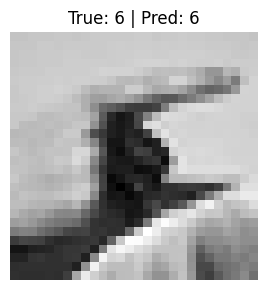

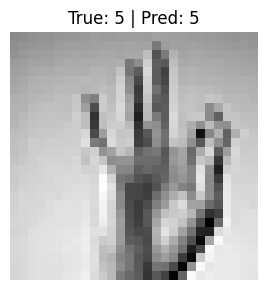

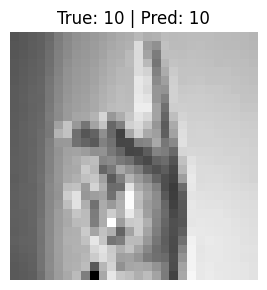

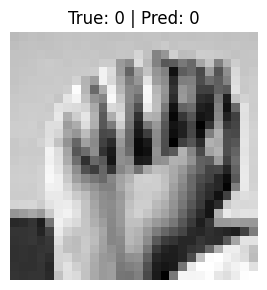

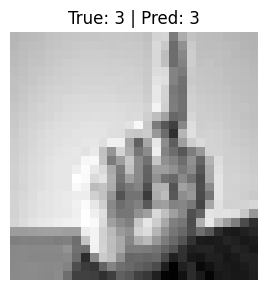

In [7]:
# Show 5 test predictions
for i in range(5):
    img = np.array(X_test.iloc[i]).reshape(28, 28)
    plt.figure(figsize=(3, 3))
    plt.imshow(img, cmap='gray', interpolation='nearest')
    plt.title(f"True: {y_test.iloc[i]} | Pred: {y_pred[i]}", fontsize=12)
    plt.axis('off')
    plt.tight_layout()
    plt.show()